In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
x_train = pd.read_csv('../../data/x_train.txt', header=None, sep=' ')
y_train = pd.read_csv('../../data/y_train.txt', header=None, sep=' ')
x_test = pd.read_csv('../../data/x_test.txt', header=None, sep=' ')

In [3]:
df_train = pd.concat([x_train, y_train], axis=1)
df_train.columns = [ 'x'+str(i) for i in range(1, df_train.shape[1]) ] + ['y']    
df_train.head()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,x492,x493,x494,x495,x496,x497,x498,x499,x500,y
0,-2.619773,-2.619533,-1.199350,-1.083335,-1.000910,-0.366967,-2.164037,-1.210001,-0.658311,-1.489539,...,10.343346,10.717519,7.709295,5.894554,12.416573,6.765269,16.243907,7.209524,8.082021,0
1,-1.415579,-1.782544,-2.880270,-1.958863,1.159968,0.273030,-1.628728,-0.175813,-0.916857,-0.570166,...,5.195818,3.494627,5.529154,10.517576,15.697333,11.324938,12.187670,12.283861,5.032285,0
2,-2.745092,-1.382945,-1.626015,-1.282560,-0.663146,0.052349,-2.403322,-0.765073,-0.394354,-0.806624,...,9.267515,4.705604,6.642557,14.658934,8.130767,7.194487,11.939354,11.653620,5.942778,1
3,0.618998,0.455364,-0.115081,0.649040,-0.862207,2.308504,0.526114,-1.094852,1.088656,-0.481210,...,3.852231,11.059702,7.527268,7.253120,9.791136,6.089743,10.752796,5.778888,10.366363,1
4,-0.070694,-0.550509,-0.565556,-0.693065,-0.573089,-0.395862,0.003170,-0.981609,-0.505775,-0.758430,...,11.229665,11.318915,6.622256,12.557882,5.520360,5.397359,13.152269,10.684779,9.816471,1


In [4]:
x_test.columns = [ 'x'+str(i) for i in range(1, x_test.shape[1]+1) ]
x_test.head()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,x491,x492,x493,x494,x495,x496,x497,x498,x499,x500
0,4.614910,3.533239,1.411254,1.928403,1.422256,1.684378,4.224090,1.836643,1.113460,1.939384,...,17.571403,12.539209,10.277104,11.655283,3.832188,12.160098,13.394882,6.672058,4.921887,22.506197
1,-0.169494,-0.855981,1.298991,0.351354,0.076671,1.865869,-0.129600,1.308967,1.067060,-1.854199,...,9.802786,12.230521,14.895335,5.429700,7.548378,2.895408,7.964216,8.052888,9.861593,5.841048
2,2.444993,1.659628,1.232445,1.121979,1.202193,1.683490,1.857638,2.039331,1.144583,-0.094331,...,10.570174,1.451766,16.452995,10.242988,3.719581,4.879446,10.613660,6.040261,4.856464,1.471197
3,0.588978,-1.141823,1.415624,-1.170370,-0.168715,-1.056512,-0.008172,-0.044626,-0.972869,-1.989544,...,7.797473,9.931698,3.904975,7.980700,6.255570,8.203613,14.295876,16.386562,9.864862,16.282600
4,-1.178631,0.273273,0.486322,2.193375,0.486168,1.052559,-1.034791,1.051397,1.885784,0.795154,...,5.498196,4.896865,12.892968,12.053610,4.856872,2.809012,7.240177,3.184421,7.564601,4.979622


## Analyze the distributions

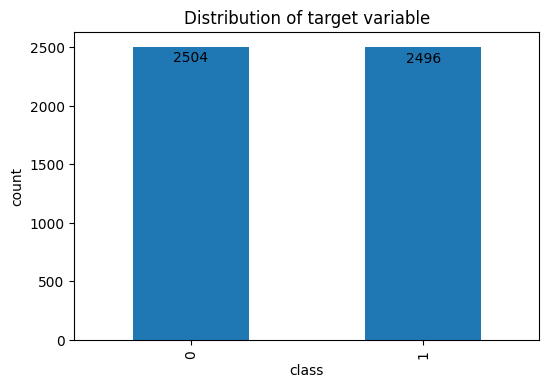

In [5]:
value_counts = df_train['y'].value_counts()
plt.figure(figsize=(6, 4))
ax = value_counts.plot(kind='bar', title='Distribution of target variable')
for i, count in enumerate(value_counts):
    ax.text(i, count-150, str(count), ha='center', va='bottom', fontsize=10)
ax.set_xlabel('class')
ax.set_ylabel('count')
plt.show()

The classes are roughly balanced, with a slight imbalance towards the negative class.

In [6]:
# t-test
from utils import t_test_features_selection

significant_features = t_test_features_selection(df_train, pvalue=0.05)
print("Significant features:", significant_features)
print("Number of significant features:", len(significant_features))

Significant features: ['x149', 'x156', 'x176', 'x205', 'x207', 'x22', 'x221', 'x253', 'x267', 'x274', 'x286', 'x304', 'x322', 'x324', 'x329', 'x336', 'x340', 'x352', 'x36', 'x361', 'x404', 'x413', 'x459', 'x467', 'x490', 'x499', 'x58', 'x61', 'x65', 'x76', 'x99']
Number of significant features: 31


In [7]:
# show means and stddev of significant features
df_train.groupby('y').agg(['mean', 'std'])[significant_features].T


y                 0         1
x149 mean -0.034972  0.020946
     std   0.991620  1.016620
x156 mean -0.056634  0.022254
     std   1.018558  0.988533
x176 mean -0.059784  0.005036
...             ...       ...
x65  std   1.019156  0.998222
x76  mean -0.038354  0.021817
     std   0.988826  1.007302
x99  mean -0.020760  0.036189
     std   0.991791  1.013074

[62 rows x 2 columns]

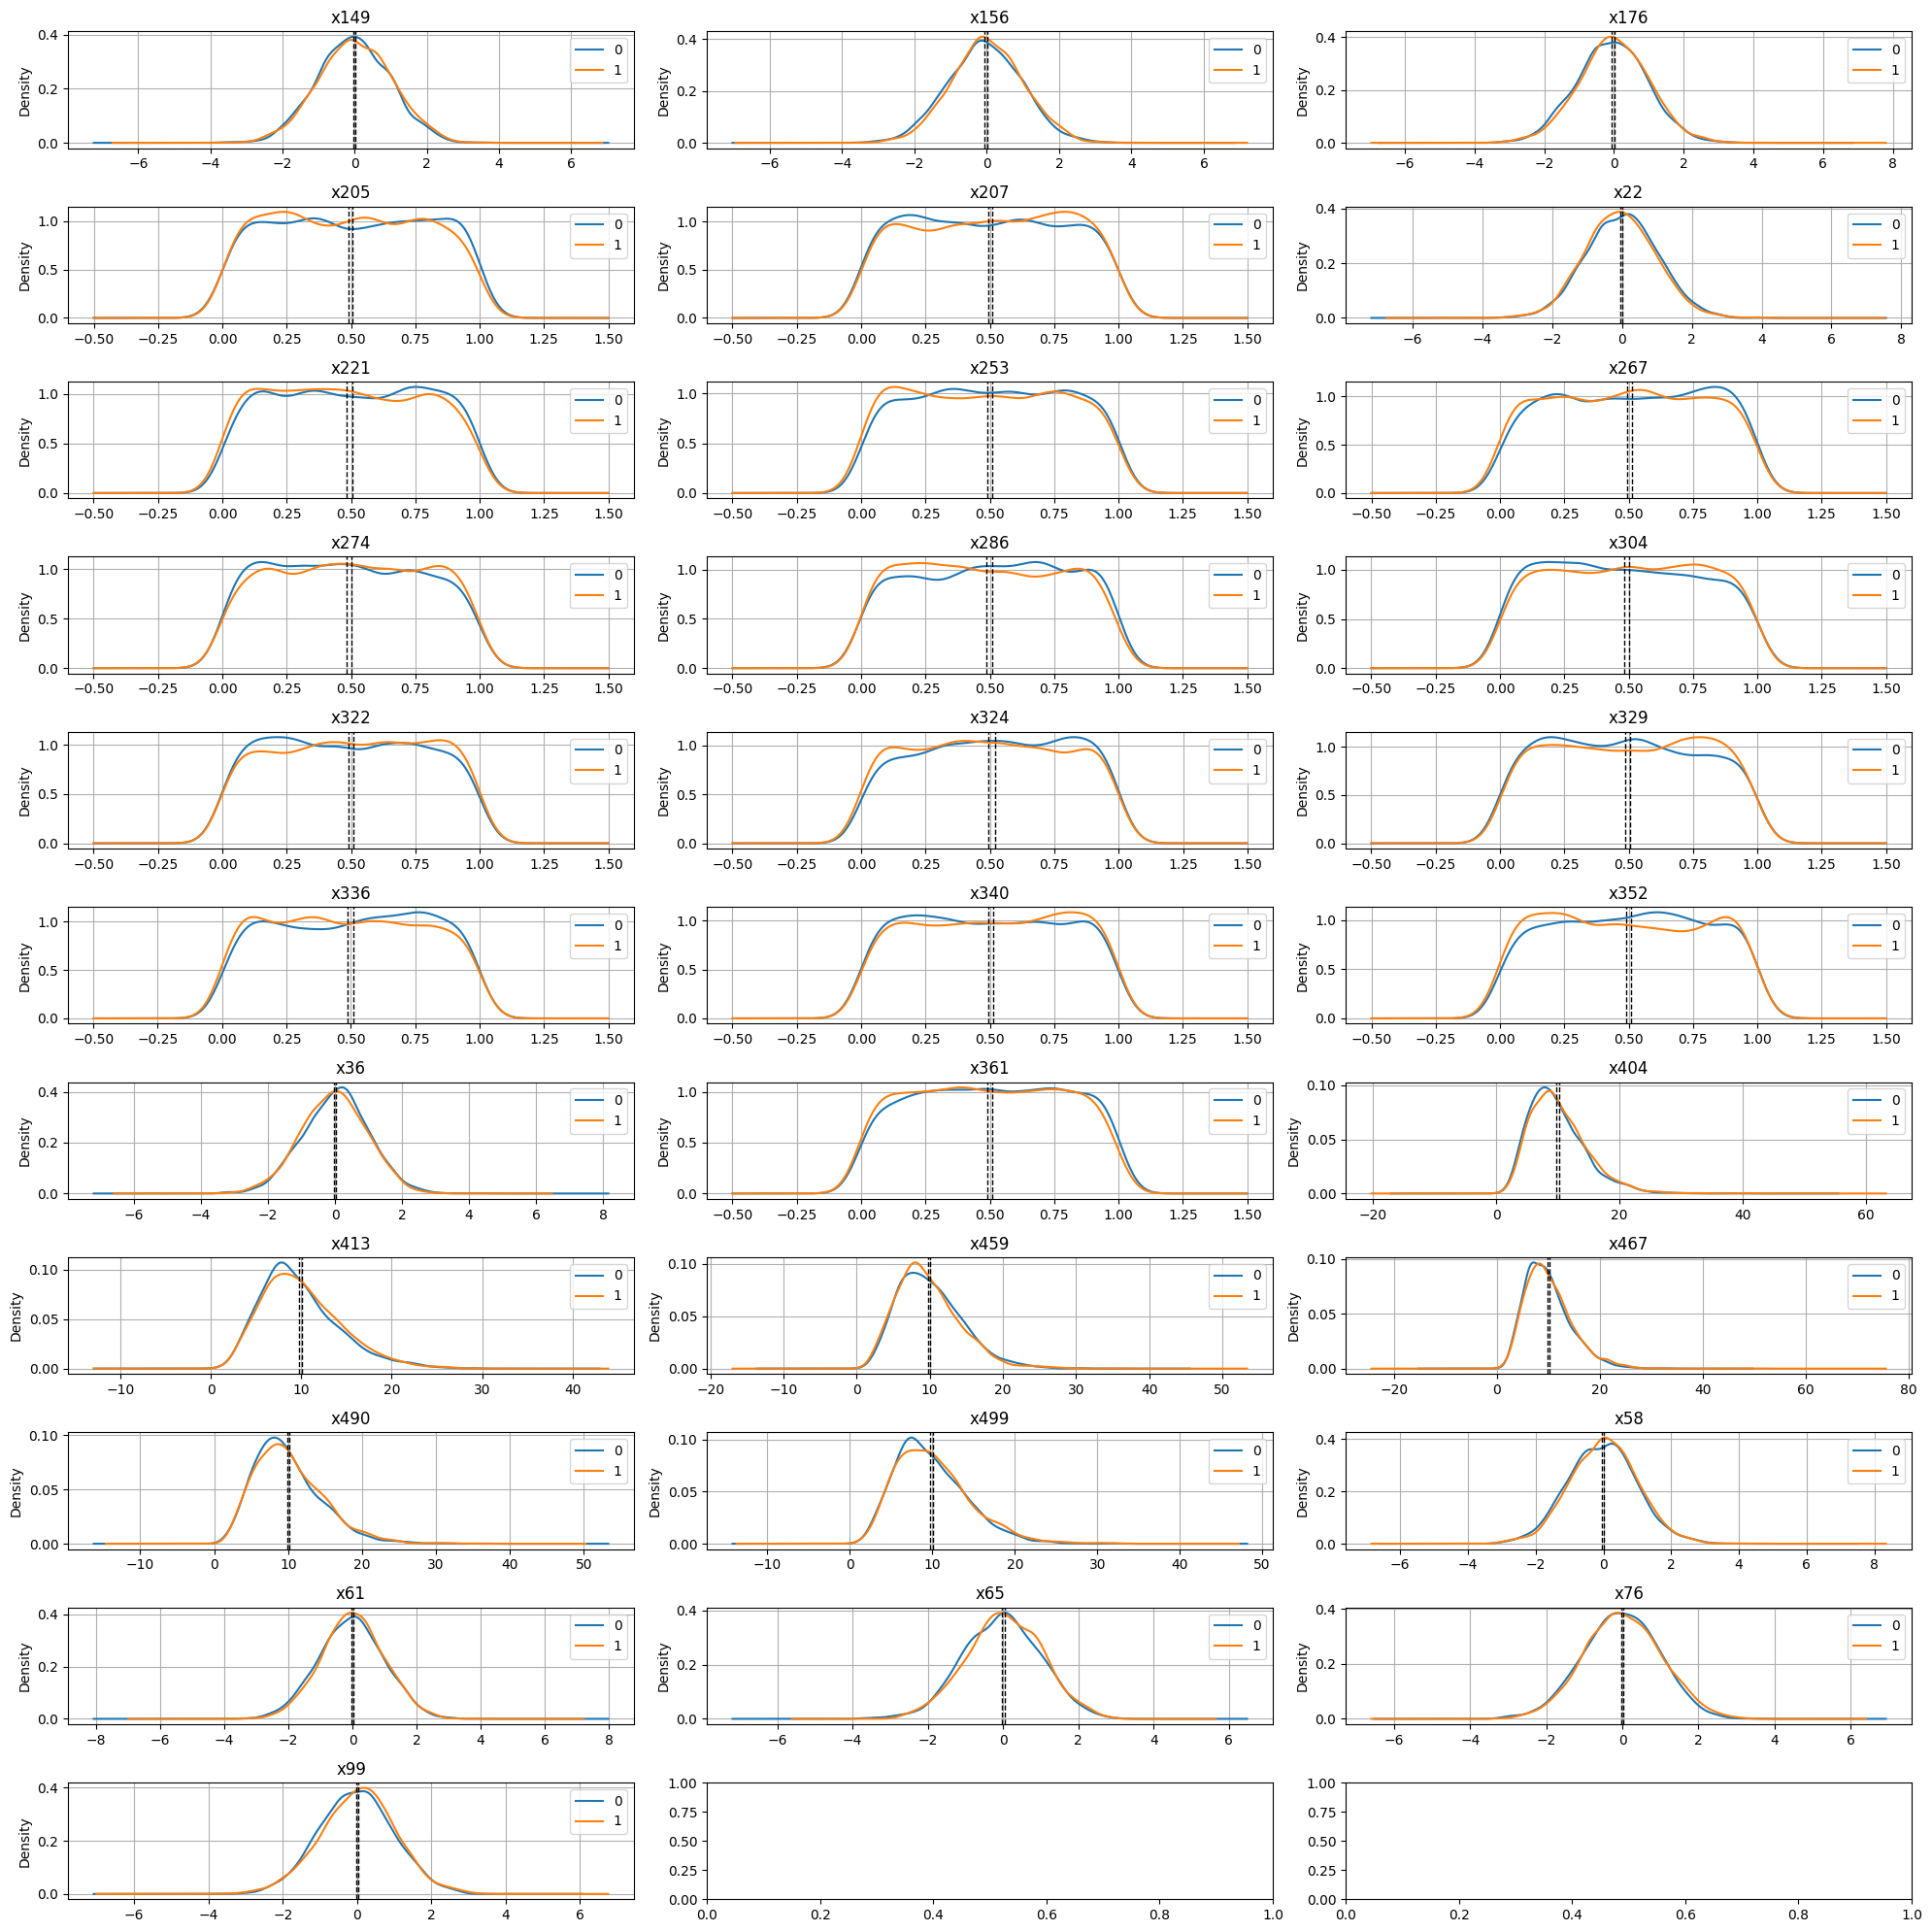

In [8]:
# plot kdes of significant features

ax, fig = plt.subplots(len(significant_features)//3+1, 3, figsize=(20, 20)  )

for feature in significant_features:
    row = (significant_features.index(feature)) // 3
    col = (significant_features.index(feature)) % 3
    

    for label in df_train['y'].unique():
        df_train[feature][df_train['y'] == label].plot(kind='kde', ax=fig[row, col], label=label)

    # add vertical line for means
    for label in df_train['y'].unique():
        fig[row, col].axvline(df_train[feature][df_train['y'] == label].mean(), color='black', linestyle='dashed', linewidth=1)
    fig[row, col].set_title(feature)
    fig[row, col].legend()
    fig[row, col].grid()
ax.tight_layout()
# add vertical space between subplots
plt.subplots_adjust(hspace=0.5)




T-test suggests that only 31 out of 500 features have significantly different means between the two classes (p-value <= 0.05).

In [9]:
import os, sys
sys.path.append(os.path.dirname(os.getcwd()))
from utils import kolmogorov_smirnoff_selection, t_test_features_selection

significant_features = kolmogorov_smirnoff_selection(df_train, pvalue=0.05)
print("Significant features:", significant_features)
print("Number of significant features:", len(significant_features))

Significant features: ['x1', 'x10', 'x101', 'x102', 'x103', 'x104', 'x105', 'x106', 'x132', 'x140', 'x149', 'x153', 'x156', 'x176', 'x191', 'x2', 'x22', 'x221', 'x229', 'x253', 'x286', 'x3', 'x304', 'x322', 'x323', 'x324', 'x329', 'x336', 'x35', 'x352', 'x36', 'x4', 'x40', 'x404', 'x413', 'x423', 'x459', 'x463', 'x499', 'x5', 'x58', 'x6', 'x65', 'x7', 'x74', 'x8', 'x81', 'x9', 'x99']
Number of significant features: 49


In [10]:
# show means and stddev of significant features
df_train.groupby('y').agg(['mean', 'std'])[significant_features].T


y                 0         1
x1   mean -0.000376 -0.030239
     std   1.784960  2.088467
x10  mean -0.002971 -0.019657
     std   1.445101  1.744716
x101 mean -0.000143 -0.004237
...             ...       ...
x81  std   1.000969  1.011723
x9   mean -0.019593 -0.029562
     std   1.468708  1.844684
x99  mean -0.020760  0.036189
     std   0.991791  1.013074

[98 rows x 2 columns]

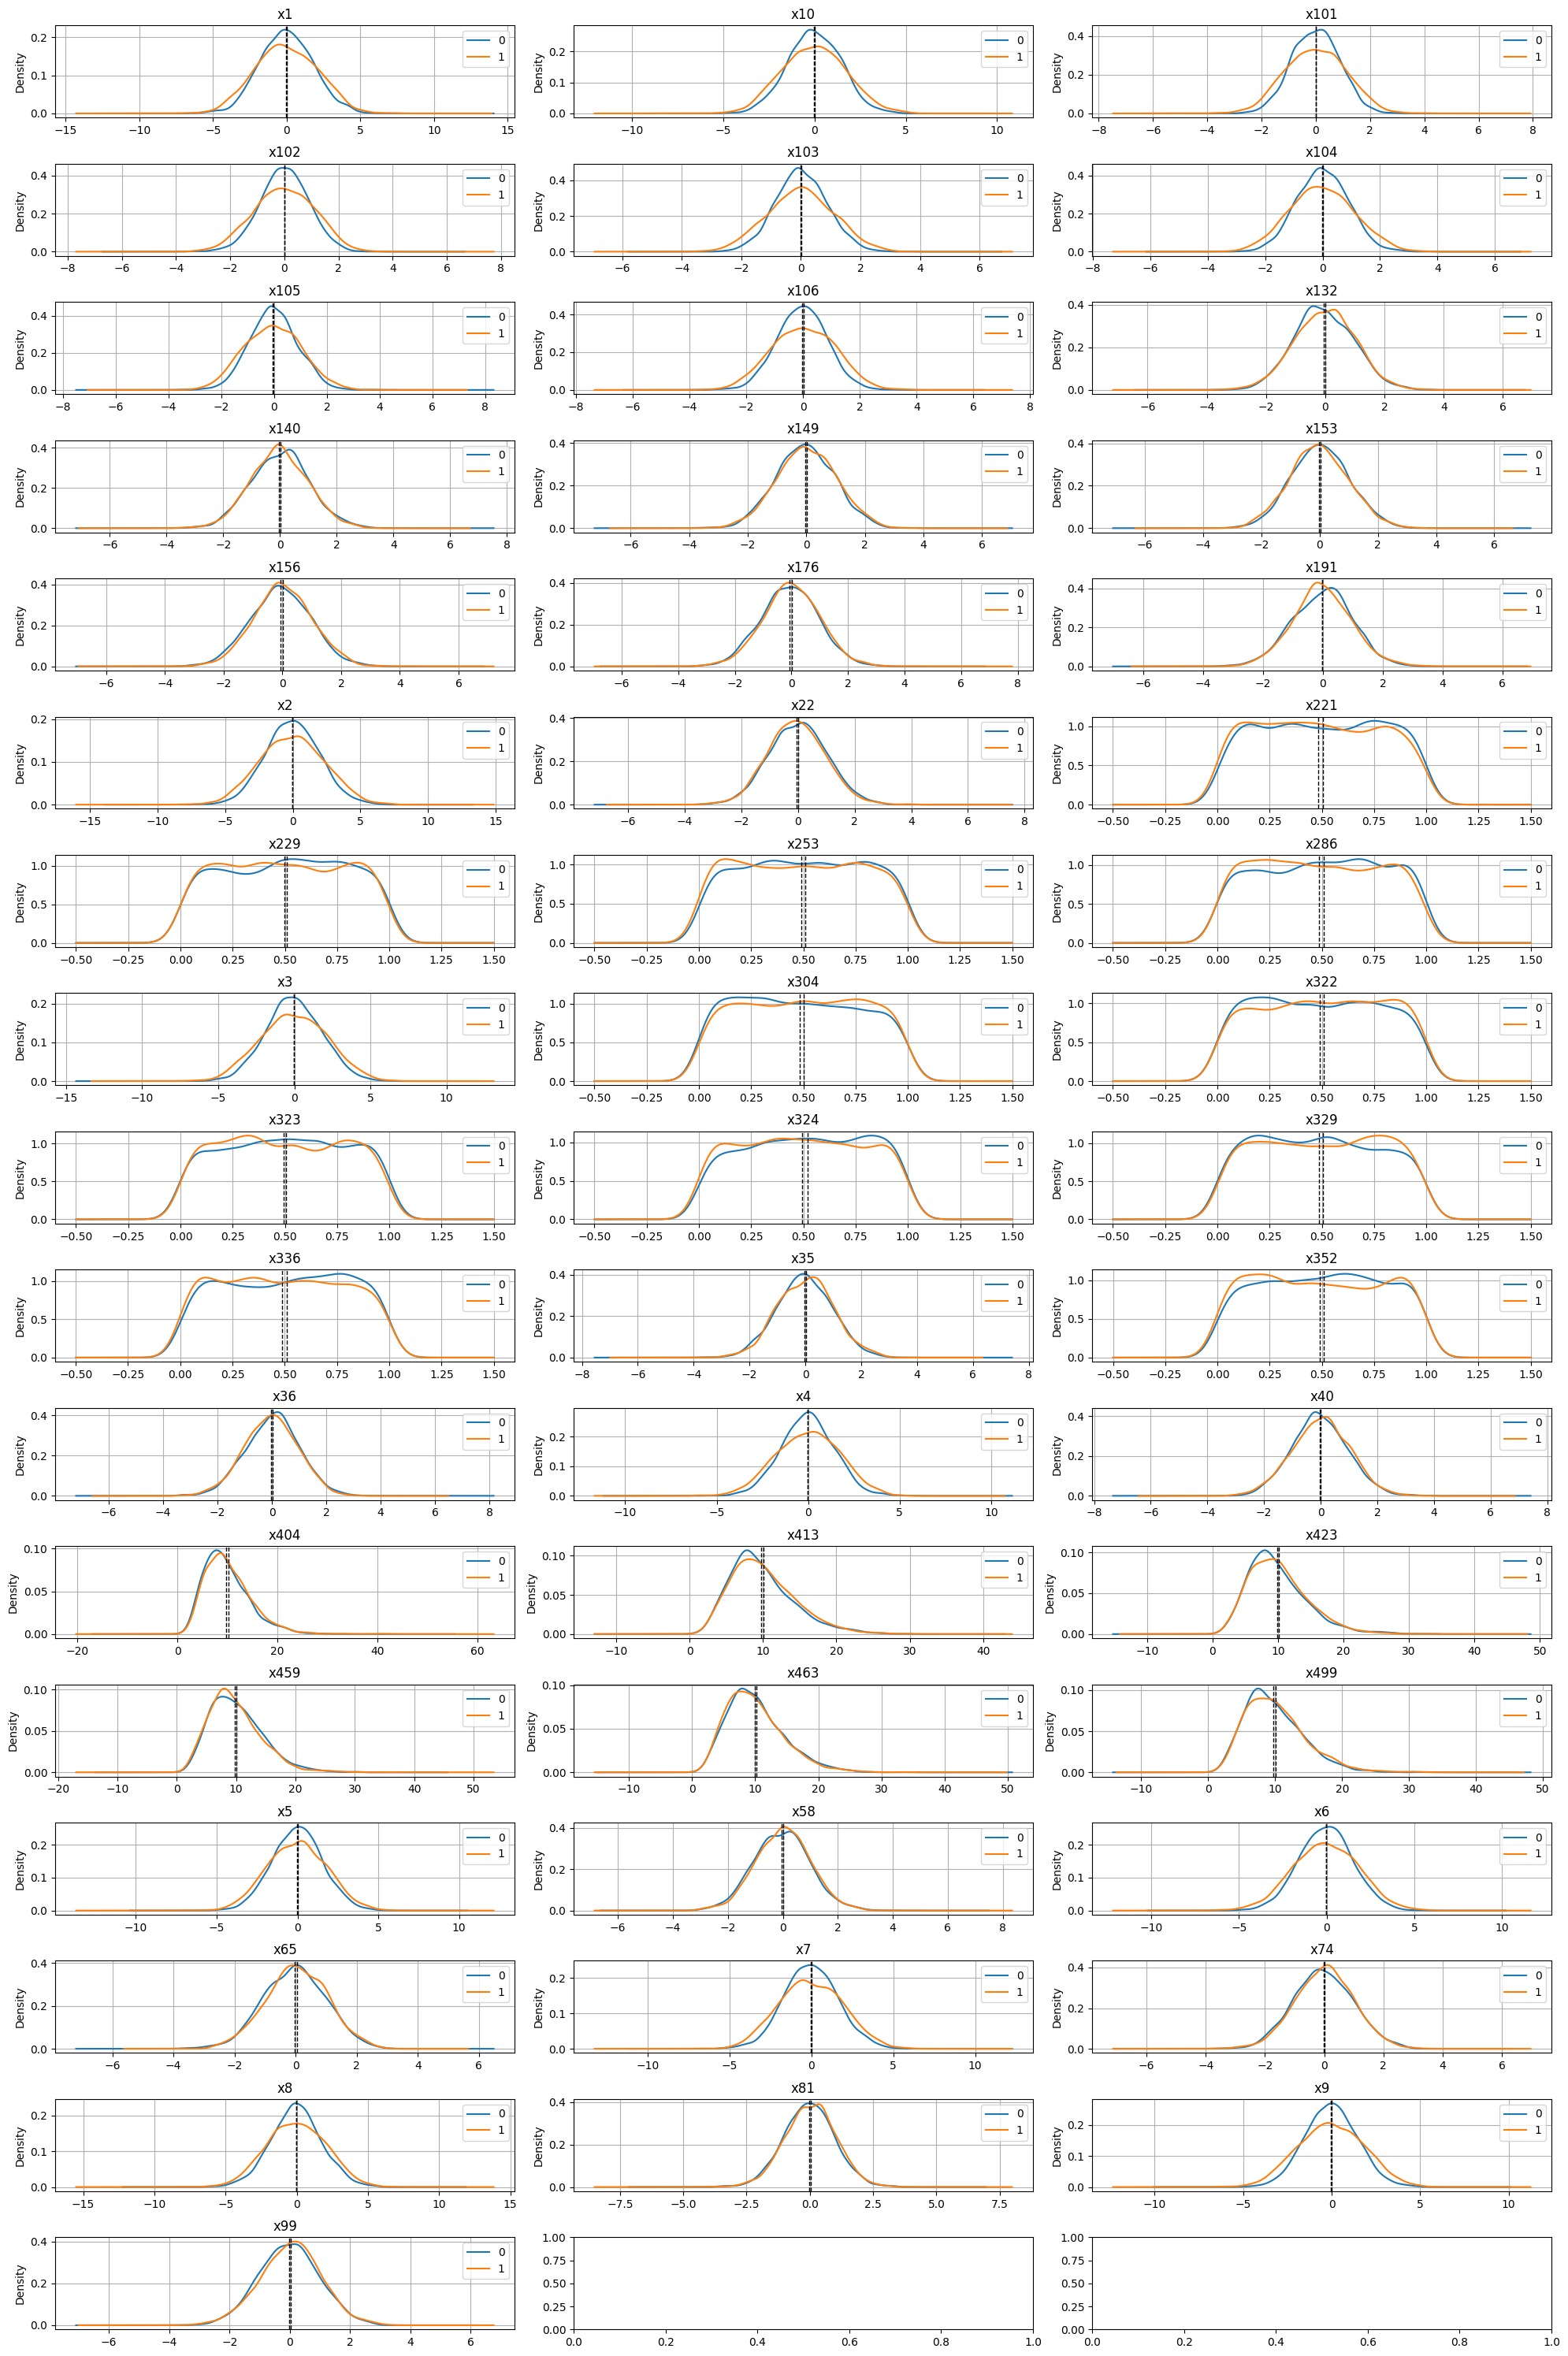

In [12]:
# plot kdes of significant features

ax, fig = plt.subplots(len(significant_features)//3+1, 3, figsize=(20, 30)  )

for feature in significant_features:
    row = (significant_features.index(feature)) // 3
    col = (significant_features.index(feature)) % 3
    

    for label in df_train['y'].unique():
        df_train[feature][df_train['y'] == label].plot(kind='kde', ax=fig[row, col], label=label)

    # add vertical line for means
    for label in df_train['y'].unique():
        fig[row, col].axvline(df_train[feature][df_train['y'] == label].mean(), color='black', linestyle='dashed', linewidth=1)
    fig[row, col].set_title(feature)
    fig[row, col].legend()
    fig[row, col].grid()
ax.tight_layout()
# add vertical space between subplots
plt.subplots_adjust(hspace=0.5)
